# Linear Regression with Time series

We are dealing with the time series dataset of Manipur. The dataset is present in https://github.com/debashish05/Time-Series-Analysis-and-Weather-Forecast-of-Manipur/blob/main/manipur_temperature-2010-2020.csv. The data is taken from Imphal airport. Initially we will use some basic algorithms and then later move on to the advanced algorithm like ARIMA , SARIMA and SARIMAX. This notebook covers
1. Linear Regression with timestamp and lag features. 
2. Trends 

**Time-step features**

There are two kinds of features unique to time series: time-step features and lag features.

Time-step features are features we can derive directly from the time index. The most basic time-step feature is the time dummy, which counts off time steps in the series from beginning to end.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r"https://github.com/debashish05/Time-Series-Analysis-and-Weather-Forecast-of-Manipur/raw/main/manipur_temperature-2010-2020.csv",
                 index_col="Date (YYYY-MM-DD)",parse_dates=["Date (YYYY-MM-DD)"])
df.head()

,Temperature (in Fahrenheit)
Date (YYYY-MM-DD),
2010-01-01,57.2
2010-01-02,57.2
2010-01-03,57.2
2010-01-04,57.2
2010-01-05,59.0


**Time Step-features**

In [ ]:
import numpy as np
df['Time'] = np.arange(len(df.index))
df.head()

,Temperature (in Fahrenheit),Time
Date (YYYY-MM-DD),,
2010-01-01,57.2,0
2010-01-02,57.2,1
2010-01-03,57.2,2
2010-01-04,57.2,3
2010-01-05,59.0,4


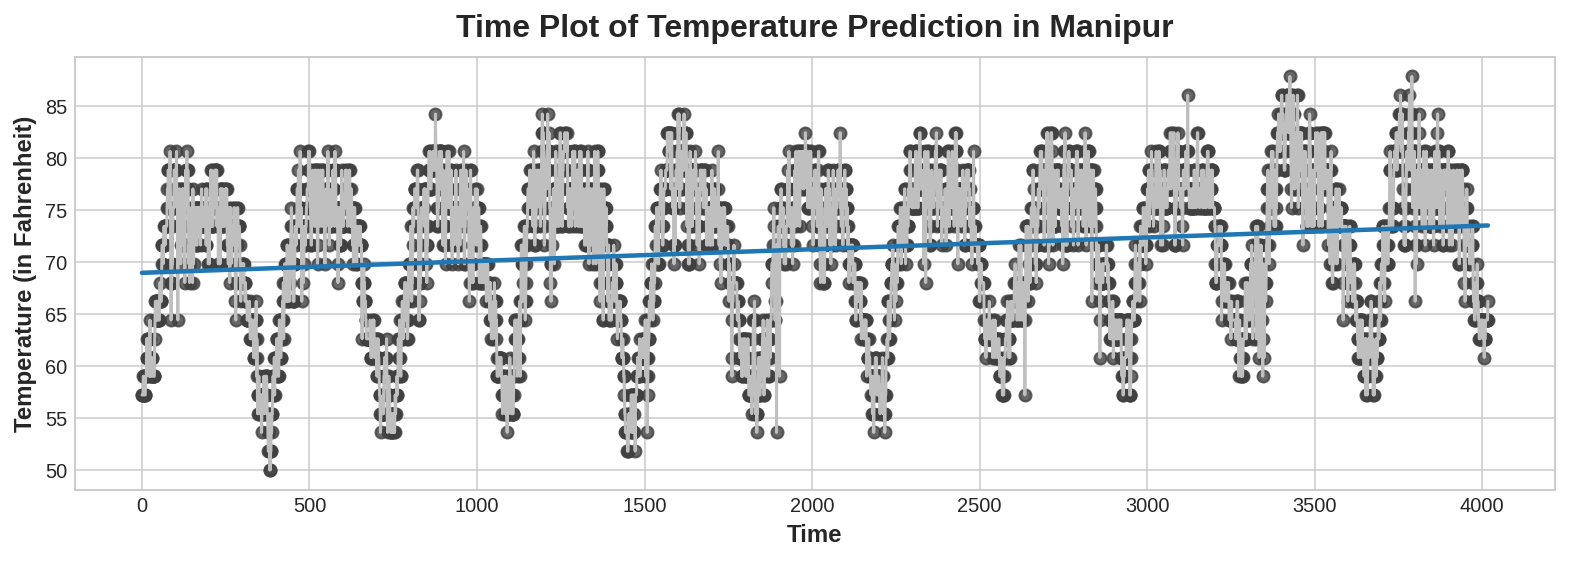

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Temperature (in Fahrenheit)', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Temperature (in Fahrenheit)', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Temperature Prediction in Manipur');



**Lag features**
Considering Previous day temperature to predict the next day (for simplicity). 


In [ ]:
df['Lag_1'] = df['Temperature (in Fahrenheit)'].shift(1)
df = df.reindex(columns=['Temperature (in Fahrenheit)', 'Lag_1'])
df.head()

,Temperature (in Fahrenheit),Lag_1
Date (YYYY-MM-DD),,
2010-01-01,57.2,NaN
2010-01-02,57.2,57.2
2010-01-03,57.2,57.2
2010-01-04,57.2,57.2
2010-01-05,59.0,57.2


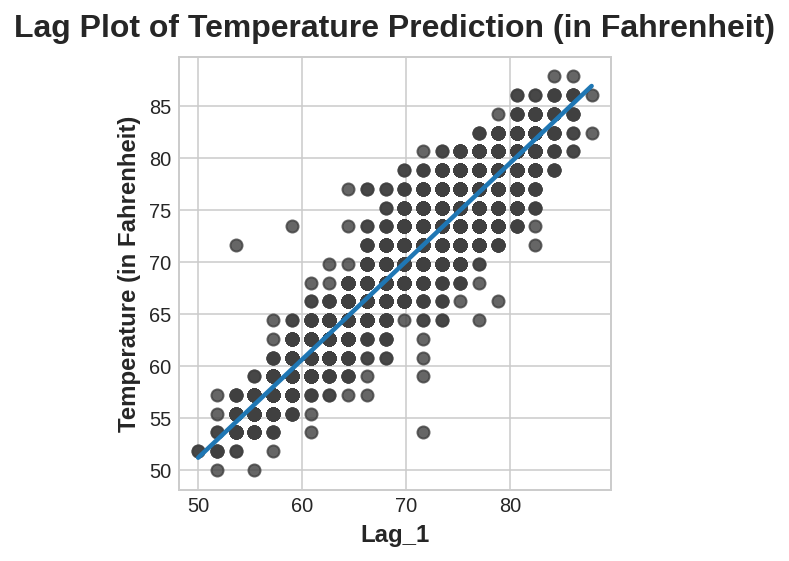

In [ ]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Temperature (in Fahrenheit)', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Temperature Prediction (in Fahrenheit)');

**Applying linear regression to time-step features**

In [ ]:
from pathlib import Path
from warnings import simplefilter

simplefilter("ignore")  # ignore warnings to clean up output cells
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))

plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

df = pd.read_csv(r"https://github.com/debashish05/Time-Series-Analysis-and-Weather-Forecast-of-Manipur/raw/main/manipur_temperature-2010-2020.csv",
                 parse_dates=["Date (YYYY-MM-DD)"])
df=df.set_index("Date (YYYY-MM-DD)")
df = df.to_period()
df.head()

,Temperature (in Fahrenheit)
Date (YYYY-MM-DD),
2010-01-01,57.2
2010-01-02,57.2
2010-01-03,57.2
2010-01-04,57.2
2010-01-05,59.0


**Linear Regression for Time-step feature**

In [ ]:
df1 = df.copy()
df1['Time'] = np.arange(len(df.index))
df1.head()

,Temperature (in Fahrenheit),Time
Date (YYYY-MM-DD),,
2010-01-01,57.2,0
2010-01-02,57.2,1
2010-01-03,57.2,2
2010-01-04,57.2,3
2010-01-05,59.0,4


In [ ]:
from sklearn.linear_model import LinearRegression

# Training data
X = df1.loc[:, ['Time']]  # features
y = df1.loc[:, 'Temperature (in Fahrenheit)']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

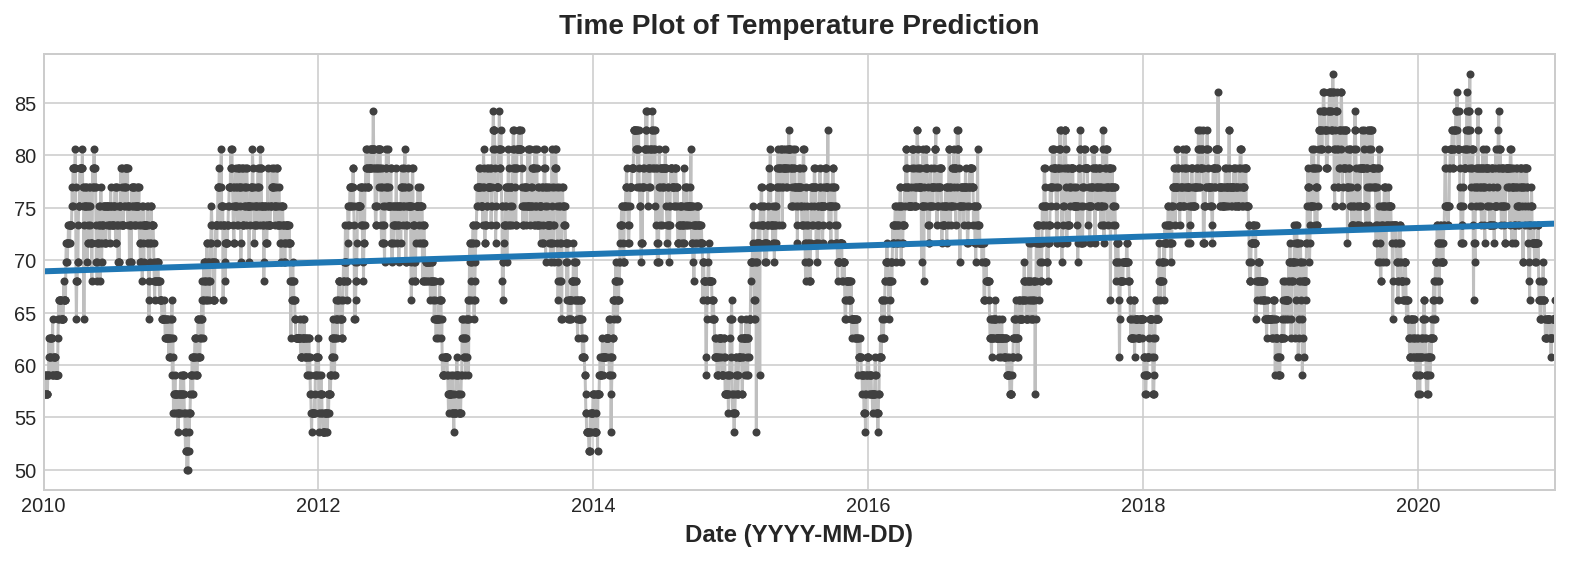

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Temperature Prediction');

Linear Regression for Lag features

In [ ]:
df1['Lag_1'] = df1['Temperature (in Fahrenheit)'].shift(1)
df1.head()


,Temperature (in Fahrenheit),Time,Lag_1
Date (YYYY-MM-DD),,,
2010-01-01,57.2,0,NaN
2010-01-02,57.2,1,57.2
2010-01-03,57.2,2,57.2
2010-01-04,57.2,3,57.2
2010-01-05,59.0,4,57.2


In [ ]:
from sklearn.linear_model import LinearRegression

X = df1.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df1.loc[:, 'Temperature (in Fahrenheit)']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

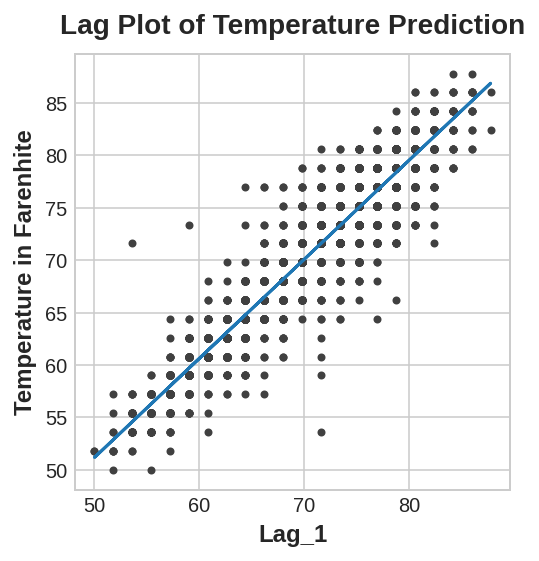

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Temperature in Farenhite')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Temperature Prediction');

Prediction from a lag feature mean about how well we can predict the series across time. The following time plot shows us how our forecasts now respond to the behavior of the series in the recent past.

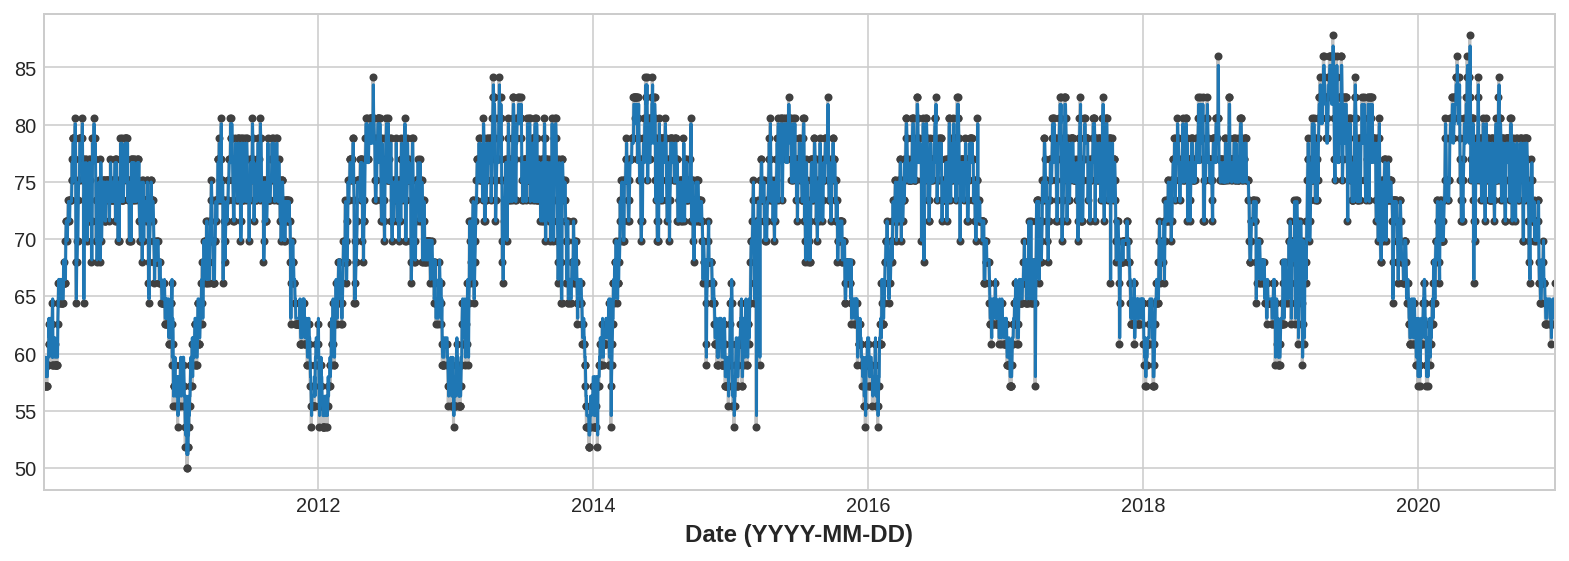

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

# TRENDS

**Trend:** The trend component of a time series represents a persistent, long-term change in the mean of the series.

**Moving Average:** To see what kind of trend a time series might have, we can use a moving average plot. To compute a moving average of a time series, we compute the average of the values within a sliding window of some defined width. Each point on the graph represents the average of all the values in the series that fall within the window on either side. The idea is to smooth out any short-term fluctuations in the series so that only long-term changes remain.

In [ ]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))

plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

df = pd.read_csv(r"https://github.com/debashish05/Time-Series-Analysis-and-Weather-Forecast-of-Manipur/raw/main/manipur_temperature-2010-2020.csv",
                 parse_dates=["Date (YYYY-MM-DD)"])
df=df.set_index("Date (YYYY-MM-DD)")
df = df.to_period()
df.head()

,Temperature (in Fahrenheit)
Date (YYYY-MM-DD),
2010-01-01,57.2
2010-01-02,57.2
2010-01-03,57.2
2010-01-04,57.2
2010-01-05,59.0


To create a moving average, first use the rolling method to begin a windowed computation. Follow this by the mean method to compute the average over the window. As we can see, the trend of temperature appears to be about linear.

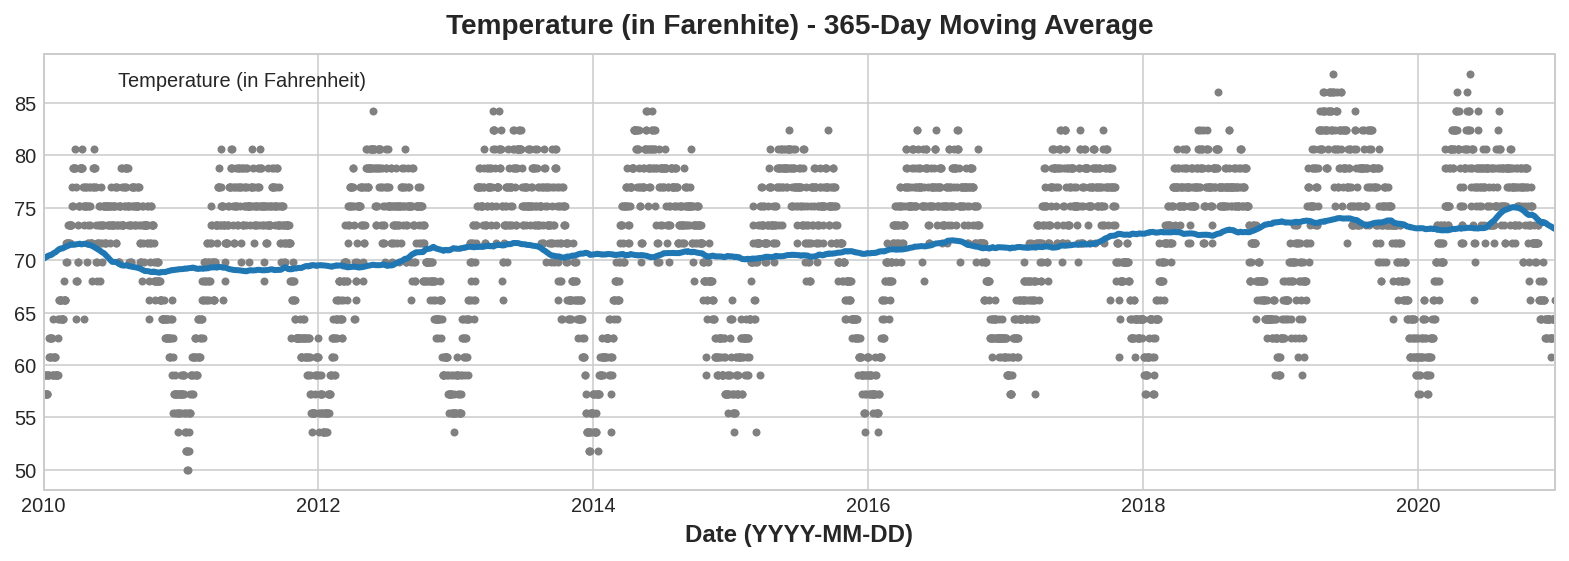

In [ ]:
moving_average = df.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = df.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Temperature (in Farenhite) - 365-Day Moving Average", legend=False,
);


 From now on, however, we'll use a function from the statsmodels library called DeterministicProcess. Using this function will help us avoid some tricky failure cases that can arise with time series and linear regression. The order argument refers to polynomial order: 1 for linear, 2 for quadratic, 3 for cubic, and so on.

In [ ]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=df.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

X.head()

,const,trend
Date (YYYY-MM-DD),,
2010-01-01,1.0,1.0
2010-01-02,1.0,2.0
2010-01-03,1.0,3.0
2010-01-04,1.0,4.0
2010-01-05,1.0,5.0


In [ ]:
from sklearn.linear_model import LinearRegression

y = df["Temperature (in Fahrenheit)"]  # the target

# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

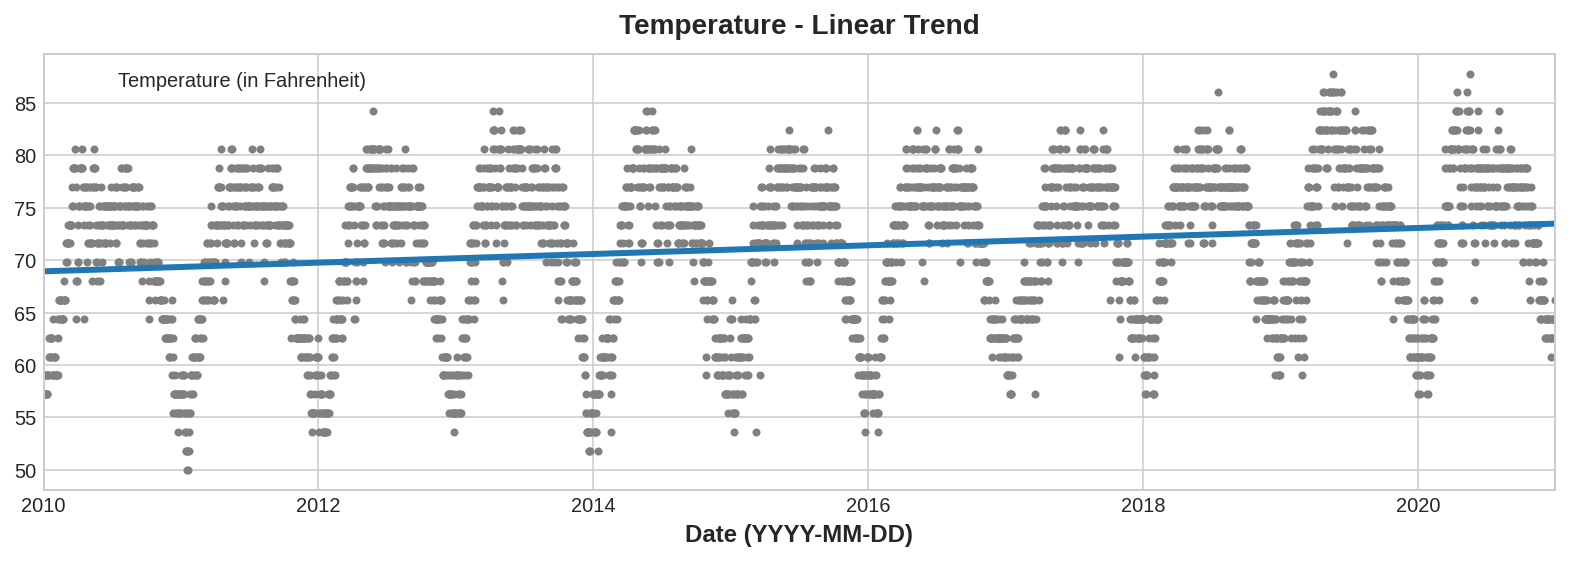

In [ ]:
ax = df.plot(style=".", color="0.5", title="Temperature - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

**From moving average and fitting a linear model we indentified that trend is linearly increasing with a small slope.**